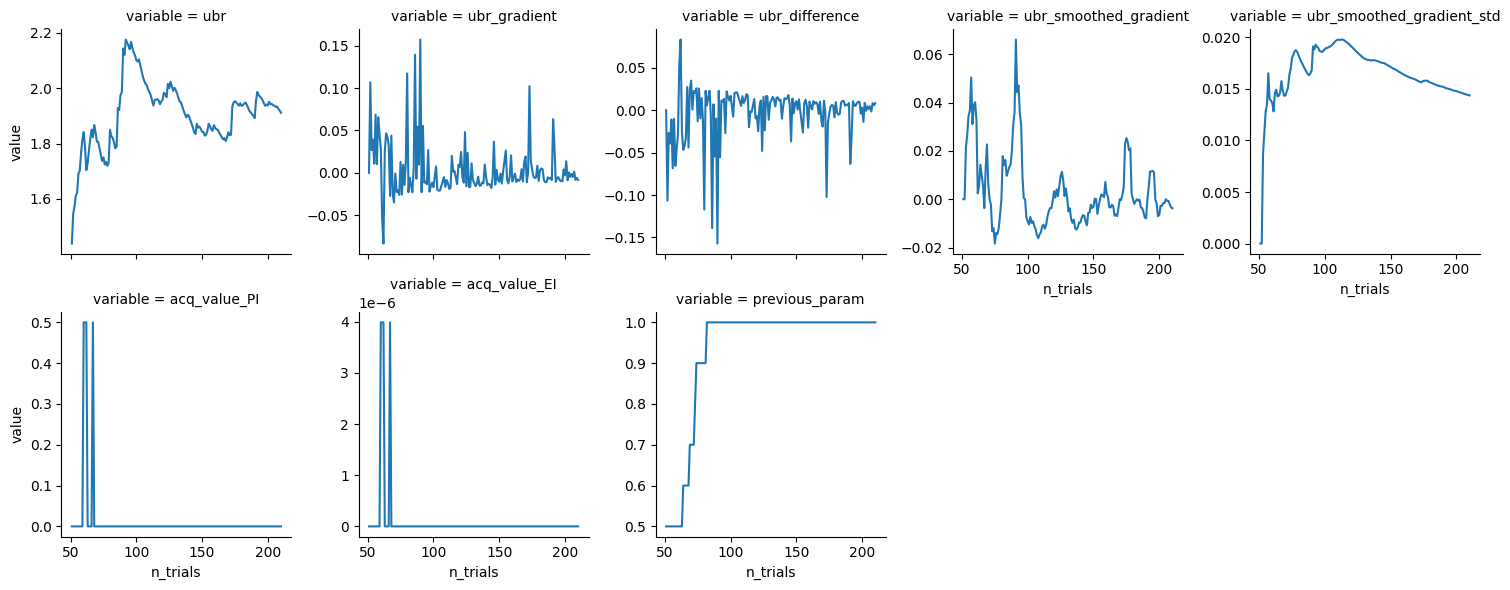

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from carps.analysis.gather_data import read_jsonl_content

fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/BBOB/bbob/2/1/0/1/DACBOEnvLogs.jsonl"
fn = "/scratch/hpc-prf-intexml/cbenjamins/repos/dacboenv/runstmp/SAWEI/YAHPO/yahpo/so/nb301/CIFAR10/None/1/DACBOEnvLogs.jsonl"
obs = read_jsonl_content(fn)
obs_keys = list(obs.iloc[0]["observation"].keys())
expanded = obs["observation"].apply(pd.Series)
expanded.columns = obs_keys
obs = obs.drop(columns="observation").join(expanded)
obs = obs.melt(id_vars=["n_trials"], value_vars=obs_keys)


grid = sns.FacetGrid(data=obs, col="variable", col_wrap=5, sharex=True, sharey=False)
grid.map_dataframe(sns.lineplot, x="n_trials", y="value")
plt.show()